In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

portfolio_df = pd.read_csv(
    '/Users/paul/Desktop/financetest/combined_stock_data_in_usd.csv',
    parse_dates=['Date'], index_col='Date'
)
#skipping initial rows as they are headers but badly formatted
benchmark_df = pd.read_csv(
    '/Users/paul/Desktop/financetest/734559 - MSCI ACWI IMI Future Education Index  - 2020-04-01 - 2025-04-01  - Monthly.csv',
    skiprows=3, parse_dates=['Date'], index_col='Date'
)
benchmark_df.columns = benchmark_df.columns.str.strip()
benchmark_series = benchmark_df.rename(
    columns={"MSCI ACWI IMI Future Education Index": "Benchmark"}
)["Benchmark"]


In [ ]:

# Raw weights (from excel solver optimization)
raw_weights = {
    'NAVNETEDUL.NS': 0.1, '600757.SS': 0.005, '601858.SS': 0.005,
    '300654.SZ': 0.005, '601928.SS': 0.005, 'PSON': 0.1,
    '300359.SZ': 0.005, '4323.T': 0.005, 'DSY.PA': 0.005,
    'CAP.PA': 0.005, 'OMG.L': 0.005, '300338.SZ': 0.005,
    'YDUQ3.SA': 0.005, 'COGN3.SA': 0.1, '000526.SZ': 0.005,
    '003032.SZ': 0.005, 'ACAD.ST': 0.1, '215200.KQ': 0.005,
    'RM.L': 0.005, 'ATGE': 0.005, 'APEI': 0.1,
    'BFAM': 0.022356322, 'COUR': 0.1, 'LOPE': 0.005,
    'LAUR': 0.022356322, 'LINC': 0.005, 'LRN': 0.005,
    'UDMY': 0.022356322, 'STRA': 0.034482759,
    'UTI': 0.034482759, 'AFYA': 0.034482759, 'QSG': 0.034482759
}

# Map raw_weights onto the exact tickers
fixed = {}
for t in portfolio_df.columns:
    if t in raw_weights:
        fixed[t] = raw_weights[t]
    elif t == 'PSON.L' and 'PSON' in raw_weights:
        fixed[t] = raw_weights['PSON']

# Normalize so total = 1
total = sum(fixed.values())
norm_weights = {t: w/total for t,w in fixed.items()}


In [ ]:

# Resample daily → month-end prices, then pct_change
monthly_prices = portfolio_df.resample('M').last()
monthly_ret = monthly_prices.pct_change()

port_rets = []
for date, row in monthly_ret.iterrows():
    avail = row.dropna().index
    wts = {t: norm_weights[t] for t in avail if t in norm_weights}
    s = sum(wts.values())
    if s>0:
        wts = {t: w/s for t,w in wts.items()}
        port_rets.append((row[list(wts)] * pd.Series(wts)).sum())
    else:
        port_rets.append(np.nan)

portfolio_series = pd.Series(port_rets, index=monthly_ret.index, name='Portfolio')

# Benchmark monthly returns (this one is easier)
benchmark_ret = benchmark_series.pct_change().rename('Benchmark')


/var/folders/mh/fnysm72j3g53gdg3ld3708nw0000gn/T/ipykernel_85557/2070414800.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = portfolio_df.resample('M').last()


In [74]:
combined

,Portfolio,Benchmark
Date,,
2020-05-31,0.031437,0.057862
2020-06-30,0.116165,0.087997
2020-07-31,0.068866,0.087676
2020-08-31,0.002898,0.018758
2020-09-30,-0.063762,0.011290
2020-10-31,-0.055131,-0.026922
2020-11-30,0.170918,0.101586
2020-12-31,0.023559,0.056375
2021-01-31,-0.029172,0.052180


In [ ]:
import pandas as pd
import numpy as np

def ann_return(r):
    return (1 + r.mean())**12 - 1

def ann_vol(r):
    return r.std() * np.sqrt(12)

def sharpe(r, rf=0.0):
    return (ann_return(r) - rf) / ann_vol(r)

# we are using T bill rate of 2% for the Sharpe ratio calculation
rf_simple = 0.02


metrics = pd.DataFrame({
    'Ann. Return': [
        ann_return(combined['Portfolio']),
        ann_return(combined['Benchmark'])
    ],
    'Ann. Volatility': [
        ann_vol(combined['Portfolio']),
        ann_vol(combined['Benchmark'])
    ],
    'Sharpe (2% RF)': [
        sharpe(combined['Portfolio'], rf=rf_simple),
        sharpe(combined['Benchmark'],  rf=rf_simple)
    ]
}, index=['Portfolio', 'Benchmark'])

print(metrics.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x))

          Ann. Return Ann. Volatility Sharpe (2% RF)
Portfolio      11.28%          22.39%         41.45%
Benchmark       8.96%          21.06%         33.05%


/var/folders/mh/fnysm72j3g53gdg3ld3708nw0000gn/T/ipykernel_85557/3811034998.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(metrics.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x))


### Max Drawdown


Max Drawdown:
          Drawdown
Portfolio  -34.36%
Benchmark  -46.53%


/var/folders/mh/fnysm72j3g53gdg3ld3708nw0000gn/T/ipykernel_85557/3967907998.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(mdd.to_frame(name='Drawdown').applymap(lambda x: f"{x:.2%}"))


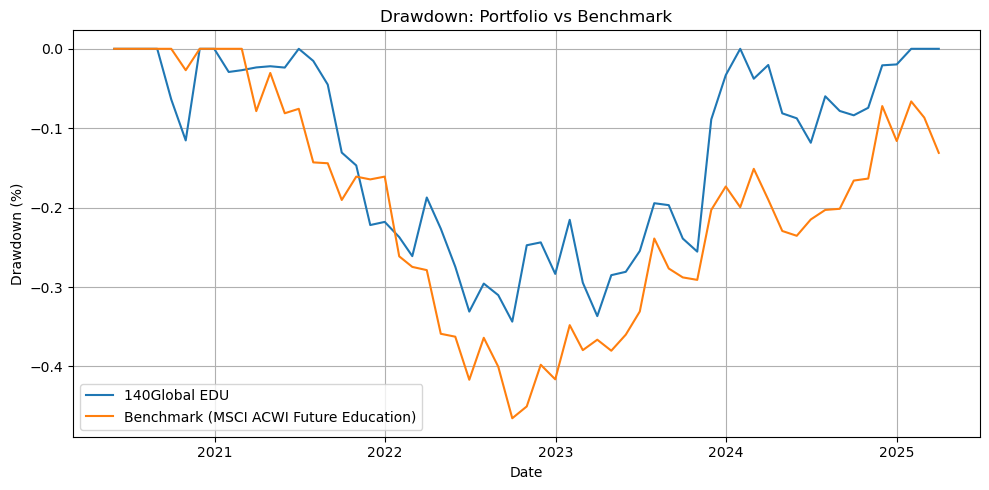

In [ ]:

# Cumulative returns
cum = (1 + combined).cumprod()
# peak & drawdown
peak = cum.cummax()
dd = cum/peak - 1

# Max drawdown
mdd = dd.min()
print("\nMax Drawdown:")
print(mdd.to_frame(name='Drawdown').applymap(lambda x: f"{x:.2%}"))

# Plot
plt.figure(figsize=(10,5))
plt.plot(dd.index, dd['Portfolio'], label='Portfolio')
plt.plot(dd.index, dd['Benchmark'], label='Benchmark')
plt.title("Drawdown: Portfolio vs Benchmark")
plt.ylabel("Drawdown")
plt.legend()
plt.legend(["EDU140", "Benchmark (MSCI ACWI Future Education)"], loc="best")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Cumulative growth chart

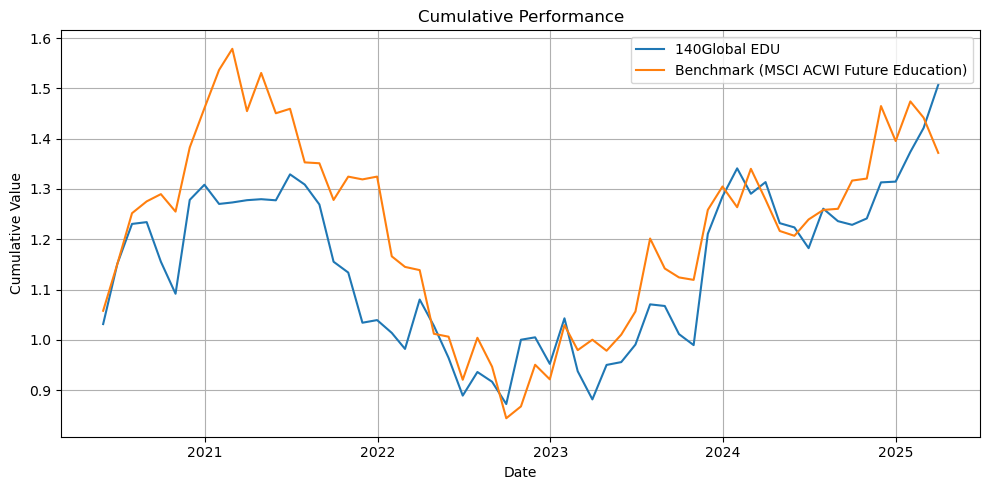

In [ ]:

cum = (1 + combined[['Portfolio','Benchmark']]).cumprod()
plt.figure(figsize=(10,5))
plt.plot(cum.index, cum['Portfolio'], label='Portfolio')
plt.plot(cum.index, cum['Benchmark'], label='Benchmark')
plt.title('Cumulative Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.legend()
plt.legend(["140Global EDU", "Benchmark (MSCI ACWI Future Education)"], loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()
